In [1]:
# chad notes:
# create a copy and edit 
# turn into pdf for presentation
# hide cells before turning into pdf


# LPL Case Study

## Part 1: Analytics Framework

### Goals:

* Which metrics are critical to evaluate? 
* At a high-level, what data would be required for these metrics and how might you source it? 
* Are there any data sensitivities? 

Imagine you’re starting a new business that provides
a service for Financial Advisors. Currently, some
Advisors independently provide the service to their
end-clients. Other Advisors do not provide the
service at all since it can be time consuming and
requires an investment upfront to build the necessary
skillset. Your new business gives the Advisor the
opportunity to outsource this service to you, saving
time for Advisors previously providing the service
and expanding the business proposition of those not
qualified to provide it. The Advisors are your direct
customers making payment to you; they also act as
a liaison between you and the end-client. Advisors
can subscribe to the service for a 6-month period in
two ways: (1) pay as you go (pay for only what is
needed at a premium cost per service) or (2)
contract with minimum commitment (discounted cost
per service with total contract amount paid in equal
amounts each month). You are part of your business’
management team that oversees both the business
itself and the team of operational staff that does the
tangible service work.

#### Which metrics are critical to evaluate?

* Finance:
    * What is our cost to provide the service?
    * Given that we have different services / pricing levels, what is our profit margin for each service?
    * What are profits and costs for each type of subscription?
    * Do certain service levels require higher operational expenses, and should these only be offered to Advisors who are managing higher amounts?
<br/>
<br/>

* Usage:
    * Of the Advisors who use the service, what percentage use each type of service?
    * Of the Advisors who use the service, what percentage use each type of subscription?
    * Over time, do we see different usage levels for each type of service we offer?
    * Are we seeing a change over time in the percentage of our Advisors who use the service vs the Advisors who don't?
    * What is the average retention / churn rate for Advisors with our services vs Advisors without our services vs overall?
        * By service type?
<br/>   
<br/>
* Clients:
    * For each service level that we offer, what percentage of end-clients are within each level, out of the clients who have Advisors that use at least one service
    * For the Advisors that switch from not using our service to using at least one service, do they see an increase in the number of clients? Is their client growth higher after starting service vs client growth prior to using the service?
    * Feedback / ratings / satisfaction among clients for each type of service offered
    * Do we see higher satisfaction rates among clients who have an Advisor that uses at least one service?
    * Conversely, do we see lower satisfcation rates among clients who have an Advisor that does not use at least one service?
    * What is the average client count for Advisors who use the service vs Advisors who don't?
        * What is the average count by service type?
    

#### At a high-level, what data would be required for these metrics and how might you source it? 

* Finance:
    * expenses / profit / revenue for each type of service
        * operations / internal teams / cost of infrastructure and tools / revenue by service type
    * expenses / profit / revenue for each type of subscription
        * operations / internal teams / cost of infrastructure and tools / revenue by subscription type
    * the amount each Advisor manages
        * sourced from the Advisors 
<br/>
<br/>
* Usage
    * what type of service does each Advisor use
        * sourced from the Advisors 
    * what type of subscription does each Advisor use 
        * sourced from the Advisors 
    * total Advisor count
        * internal data / sourced from the Advisors
<br/>    
<br/>
* Clients
    * count of clients by month for each service type 
        * sourced from the Advisors 
    * count of clients by month for each Advisor 
        * sourced from the Advisors 
    * client feedback 
        * survey data, form on a website
    * how many clients leave each month
        * internal data or the Advisors
    

#### Are there any data sensitivities? 

* Any PII related to clients should be scrubbed out, except for maybe age (but DOB should not be included)
* Advisor PII should be scrubbed from the data and only referred to by ID unless we need to communicate with them directly
* Once we determine what metrics to use, we should also determine which of those metrics can be shared with Advisors and clients and which metrics should stay internal to management

## Part 2: Data Analysis

### Goals:

* Explore the data and see what insights you can find 
* Determine how best to visualize the data 
* Start with a descriptive analysis of the historical data
    * What is essential to know? 
    * Profitability, sales, operational efficiency & productivity... are there trends, good or bad? 
* Bonus (not required) Perform a simple predictive analysis to forecast one of the metrics

In [124]:
import sqlite3
import pandas as pd
import numpy as np

import seaborn as sns

sns.set(rc={'figure.figsize':(20,10)})
import matplotlib.pyplot as plt

In [3]:
# Create your connection.
cnx = sqlite3.connect('case_study_data.db')

In [4]:
cnx

##### Pricing

In [5]:
price_df = pd.read_sql_query("SELECT * FROM prices", cnx)
price_df

,ServiceType,Price(\$/client),StartDate,EndDate
0,A,250.0,2022-01-01,2022-03-31
1,B,500.0,2022-01-01,2022-03-31
2,C,1000.0,2022-01-01,2022-03-31
3,A,275.0,2022-04-01,9999-12-31
4,B,550.0,2022-04-01,9999-12-31
5,C,1100.0,2022-04-01,9999-12-31


In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ServiceType       6 non-null      object 
 1   Price(\$/client)  6 non-null      float64
 2   StartDate         6 non-null      object 
 3   EndDate           6 non-null      object 
dtypes: float64(1), object(3)
memory usage: 320.0+ bytes


In [7]:
# price_df['StartDate'] = pd.to_datetime(price_df['StartDate'])
# price_df['EndDate'].loc[:2] = price_df['StartDate'].dt.date
# price_df['EndDate'].loc[3:] = pd.datetime.max.strftime('%Y-%m-%d')

In [8]:
price_df['Tier'] = ''

price_df['Tier'].loc[:2] = 'Tier 1'
price_df['Tier'].loc[3:] = 'Tier 2'

price_df

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,ServiceType,Price(\$/client),StartDate,EndDate,Tier
0,A,250.0,2022-01-01,2022-03-31,Tier 1
1,B,500.0,2022-01-01,2022-03-31,Tier 1
2,C,1000.0,2022-01-01,2022-03-31,Tier 1
3,A,275.0,2022-04-01,9999-12-31,Tier 2
4,B,550.0,2022-04-01,9999-12-31,Tier 2
5,C,1100.0,2022-04-01,9999-12-31,Tier 2


##### Expenses

In [9]:
expenses_df = pd.read_sql_query("SELECT * FROM expenses", cnx)
expenses_df

,ExpenseType,Cost(\$/FTE/hr),WorkingHours(hrs/FTE/month),Personnel(FTEs)
0,Ops,50,160,16
1,Mgmt,300,160,4


In [10]:
expenses_df['Cost per FTE'] = expenses_df['Cost(\$/FTE/hr)'] * expenses_df['WorkingHours(hrs/FTE/month)']
expenses_df['Total FTE Cost'] = expenses_df['Cost(\$/FTE/hr)'] * expenses_df['WorkingHours(hrs/FTE/month)'] * expenses_df['Personnel(FTEs)']


expenses_df

,ExpenseType,Cost(\$/FTE/hr),WorkingHours(hrs/FTE/month),Personnel(FTEs),Cost per FTE,Total FTE Cost
0,Ops,50,160,16,8000,128000
1,Mgmt,300,160,4,48000,192000


In [11]:
expenses_df['Total FTE Cost'].sum()

320000

In [12]:
expenses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ExpenseType                  2 non-null      object
 1   Cost(\$/FTE/hr)              2 non-null      int64 
 2   WorkingHours(hrs/FTE/month)  2 non-null      int64 
 3   Personnel(FTEs)              2 non-null      int64 
 4   Cost per FTE                 2 non-null      int64 
 5   Total FTE Cost               2 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 224.0+ bytes


In [13]:
edf = expenses_df.copy()
edf = pd.DataFrame(edf[edf.columns[:4]].iloc[0]).T

edf = pd.concat([edf]*1000, ignore_index=True)
edf = edf[edf.columns[:2]]
edf

,ExpenseType,Cost(\$/FTE/hr)
0,Ops,50
1,Ops,50
2,Ops,50
3,Ops,50
4,Ops,50
...,...,...
995,Ops,50
996,Ops,50
997,Ops,50
998,Ops,50


##### Advisor Info

In [14]:
advisors_df = pd.read_sql_query("SELECT * FROM advisors", cnx)
advisors_df

,AdvisorID,Channel,Tenure(yrs)
0,E76FeEaD-3a68-4BfA-84c2-1eAd8a9cB6d2,Independent,3.776759
1,4db26009-a669-47Ea-9B55-e1aa5AD49528,Independent,10.517504
2,b12967cE-e00a-4A2a-9749-0c4A4bd59e7A,Institution,3.588722
3,56AD396B-451c-42C6-8821-39fe9e7F83Ef,Independent,6.740541
4,5fE17b4C-9669-4148-B920-0f7d9C4757dA,Independent,8.893632
...,...,...,...
94,1C0d618f-9487-49A1-Ac0b-F25C6Fa23577,Independent,7.210525
95,F19F976E-bc89-4f80-9C19-C96DD19a07D1,Institution,9.194763
96,5Df74960-3a18-4759-A0f7-574d458C6F8F,Institution,7.450213
97,2FCBC349-0FC9-4d6B-8219-f93d02909729,Independent,8.275422


In [15]:
advisors_df.AdvisorID.nunique()

99

In [16]:
print('Mean Tenure: ', advisors_df['Tenure(yrs)'].mean())
print('\n')

print('Channel Count: ') 
print(advisors_df['Channel'].value_counts(dropna = False))
print('\n')

print('Mean Tenure by Channel: ')
print(advisors_df['Tenure(yrs)'].groupby(advisors_df['Channel']).mean())

Mean Tenure:  7.047214884771054


Channel Count: 
Independent    64
Institution    35
Name: Channel, dtype: int64


Mean Tenure by Channel: 
Channel
Independent    6.898702
Institution    7.318782
Name: Tenure(yrs), dtype: float64


In [116]:
advisors_df.Channel.value_counts()

Independent    64
Institution    35
Name: Channel, dtype: int64

##### Services Provided

In [17]:
services_provided_df = pd.read_sql_query("SELECT * FROM services_provided", cnx)
services_provided_df['RequestDate'] = pd.to_datetime(services_provided_df['RequestDate'])
services_provided_df

,AdvisorID,ClientID,ServiceType,RequestDate,CompleteDate,Duration,OpsTeam,OpsHours
0,5e9c8e62-a491-4ca7-8e7b-eee50ded2f43,92f9db72-588f-4caf-bc5c-81f689ea2e19,B,2022-02-26,2022-03-02,4,1,8.0
1,55507370-3a1b-435c-b954-c9a5172d2d9f,cc8cab57-8184-480f-b66d-98b2bd331376,C,2022-03-04,2022-03-11,7,1,12.4
2,34b4072b-e017-4e61-8f9a-ec5e8731d285,40c0f46e-d289-470a-9b23-85fbd61e5b5f,B,2022-05-17,2022-05-22,5,2,7.2
3,c2d87a03-eaaf-4246-aeae-eae2915afcd9,2c368dbc-05f7-4d95-96fe-270ec9ba812b,A,2022-02-07,2022-02-11,4,1,4.6
4,1f19d6fc-f172-4ab4-bb1c-5e067b824bf8,277514fe-6d66-4c4f-aacb-26065fd9d5d8,B,2022-05-09,2022-05-13,4,2,8.6
...,...,...,...,...,...,...,...,...
995,adf17392-0ab2-4b50-adb8-00b152fb7a05,89a93b24-7210-4edd-882e-a19333754b95,C,2022-03-14,2022-03-21,7,3,10.8
996,d4e0ca4d-4657-475c-af16-5f5bb48ffacd,4411ea80-3425-4d72-92a4-bb50a26fe5f6,A,2022-05-19,2022-05-21,2,3,2.5
997,d618ac35-635b-4f0e-ab84-5e19ca2b5d9f,b2614e43-81a6-429e-a7dc-6b0b0bcfc0a5,C,2022-06-07,2022-06-15,8,1,11.8
998,21c4e526-9b04-447a-abbe-adc09e468326,bdafc176-7059-41ec-8429-b5d8d6994308,A,2022-02-15,2022-02-20,5,2,6.1


In [18]:
print(services_provided_df.AdvisorID.nunique())
print(services_provided_df.ClientID.nunique())

99
947


In [19]:
services_provided_df['ServiceType'].value_counts()

A    349
C    341
B    310
Name: ServiceType, dtype: int64

In [20]:
services_provided_df['OpsTeam'].value_counts()

2    371
3    347
1    282
Name: OpsTeam, dtype: int64

In [21]:
services_provided_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   AdvisorID     1000 non-null   object        
 1   ClientID      1000 non-null   object        
 2   ServiceType   1000 non-null   object        
 3   RequestDate   1000 non-null   datetime64[ns]
 4   CompleteDate  1000 non-null   object        
 5   Duration      1000 non-null   int64         
 6   OpsTeam       1000 non-null   int64         
 7   OpsHours      1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 62.6+ KB


In [22]:
services_provided_df['Tier'] = ''
services_provided_df.loc[services_provided_df[services_provided_df['RequestDate'] < '2022-04-01'].index, 'Tier'] = 'Tier 1'
services_provided_df.loc[services_provided_df[services_provided_df['RequestDate']>= '2022-04-01'].index, 'Tier'] = 'Tier 2'

In [23]:
services_provided_df

,AdvisorID,ClientID,ServiceType,RequestDate,CompleteDate,Duration,OpsTeam,OpsHours,Tier
0,5e9c8e62-a491-4ca7-8e7b-eee50ded2f43,92f9db72-588f-4caf-bc5c-81f689ea2e19,B,2022-02-26,2022-03-02,4,1,8.0,Tier 1
1,55507370-3a1b-435c-b954-c9a5172d2d9f,cc8cab57-8184-480f-b66d-98b2bd331376,C,2022-03-04,2022-03-11,7,1,12.4,Tier 1
2,34b4072b-e017-4e61-8f9a-ec5e8731d285,40c0f46e-d289-470a-9b23-85fbd61e5b5f,B,2022-05-17,2022-05-22,5,2,7.2,Tier 2
3,c2d87a03-eaaf-4246-aeae-eae2915afcd9,2c368dbc-05f7-4d95-96fe-270ec9ba812b,A,2022-02-07,2022-02-11,4,1,4.6,Tier 1
4,1f19d6fc-f172-4ab4-bb1c-5e067b824bf8,277514fe-6d66-4c4f-aacb-26065fd9d5d8,B,2022-05-09,2022-05-13,4,2,8.6,Tier 2
...,...,...,...,...,...,...,...,...,...
995,adf17392-0ab2-4b50-adb8-00b152fb7a05,89a93b24-7210-4edd-882e-a19333754b95,C,2022-03-14,2022-03-21,7,3,10.8,Tier 1
996,d4e0ca4d-4657-475c-af16-5f5bb48ffacd,4411ea80-3425-4d72-92a4-bb50a26fe5f6,A,2022-05-19,2022-05-21,2,3,2.5,Tier 2
997,d618ac35-635b-4f0e-ab84-5e19ca2b5d9f,b2614e43-81a6-429e-a7dc-6b0b0bcfc0a5,C,2022-06-07,2022-06-15,8,1,11.8,Tier 2
998,21c4e526-9b04-447a-abbe-adc09e468326,bdafc176-7059-41ec-8429-b5d8d6994308,A,2022-02-15,2022-02-20,5,2,6.1,Tier 1


In [24]:
services_provided_df['Tier'].value_counts()

Tier 1    503
Tier 2    497
Name: Tier, dtype: int64

In [25]:
services_prices_df = pd.merge(services_provided_df, price_df)
services_prices_df

,AdvisorID,ClientID,ServiceType,RequestDate,CompleteDate,Duration,OpsTeam,OpsHours,Tier,Price(\$/client),StartDate,EndDate
0,5e9c8e62-a491-4ca7-8e7b-eee50ded2f43,92f9db72-588f-4caf-bc5c-81f689ea2e19,B,2022-02-26,2022-03-02,4,1,8.0,Tier 1,500.0,2022-01-01,2022-03-31
1,2684751e-33aa-4b1c-b495-5105c479cdb3,6d9e4b09-a946-4245-9bfb-b0cc673745db,B,2022-01-26,2022-01-31,5,2,9.8,Tier 1,500.0,2022-01-01,2022-03-31
2,6c8a8b56-4e6d-42ab-9179-e8875c522ce6,e63f5b6c-1e4f-40b4-bede-4e1aa752b432,B,2022-02-16,2022-02-21,5,1,8.3,Tier 1,500.0,2022-01-01,2022-03-31
3,1647b7e6-7a5d-49e3-9d3b-83a0dc41bb4d,cdcef44c-6a89-47d0-b312-2d22e23193b6,B,2022-02-01,2022-02-05,4,1,8.3,Tier 1,500.0,2022-01-01,2022-03-31
4,48b964ec-a15d-4ad3-a5c3-8252294da5a0,18de2217-ab4e-4656-a056-b67964891b1c,B,2022-01-26,2022-02-02,7,2,10.3,Tier 1,500.0,2022-01-01,2022-03-31
...,...,...,...,...,...,...,...,...,...,...,...,...
995,5154a635-dfe3-4a25-9b82-b1b0f76b1ce3,43e3ba2c-933a-4cfd-813a-a5cff8d51f8a,C,2022-05-20,2022-05-29,9,2,10.8,Tier 2,1100.0,2022-04-01,9999-12-31
996,6c8a8b56-4e6d-42ab-9179-e8875c522ce6,1113749b-d128-42e2-a698-26f696888b6e,C,2022-04-02,2022-04-09,7,1,11.0,Tier 2,1100.0,2022-04-01,9999-12-31
997,ac223aa9-dae5-4a82-9b80-d2333e47c1b0,2336b6a4-f49a-4a08-980b-45436c76d4c0,C,2022-04-18,2022-04-24,6,3,10.4,Tier 2,1100.0,2022-04-01,9999-12-31
998,69a64884-25f3-4a51-bec2-2464f1b7bc41,b9b4f525-887e-4046-b40b-64f300640c82,C,2022-04-30,2022-05-07,7,3,10.4,Tier 2,1100.0,2022-04-01,9999-12-31


In [26]:
services_prices_df['Tier'].value_counts()

Tier 1    503
Tier 2    497
Name: Tier, dtype: int64

In [27]:
print(services_prices_df.AdvisorID.nunique())
print(services_prices_df.ClientID.nunique())

99
947


In [28]:
print(services_prices_df.RequestDate.min())
print(services_prices_df.RequestDate.max())

2022-01-01 00:00:00
2022-06-29 00:00:00


In [29]:
print(services_prices_df.CompleteDate.min())
print(services_prices_df.CompleteDate.max())

2022-01-04
2022-07-05


In [30]:
services_prices_df.groupby(services_prices_df['Tier']).describe().T

Tier                         Tier 1       Tier 2
Duration         count   503.000000   497.000000
                 mean      5.210736     5.146881
                 std       1.977796     2.006179
                 min       1.000000     1.000000
                 25%       4.000000     4.000000
                 50%       5.000000     5.000000
                 75%       7.000000     7.000000
                 max      11.000000    10.000000
OpsTeam          count   503.000000   497.000000
                 mean      2.027833     2.102616
                 std       0.792910     0.787716
                 min       1.000000     1.000000
                 25%       1.000000     1.000000
                 50%       2.000000     2.000000
                 75%       3.000000     3.000000
                 max       3.000000     3.000000
OpsHours         count   503.000000   497.000000
                 mean      8.269781     8.095976
                 std       3.335067     3.443874
                 min       1.700000     1.500000
                 25%       5.200000     4.900000
                 50%       8.300000     8.200000
                 75%      11.500000    11.200000
                 max      14.700000    15.000000
Price(\$/client) count   503.000000   497.000000
                 mean    591.948310   631.891348
                 std     316.180173   348.797682
                 min     250.000000   275.000000
                 25%     250.000000   275.000000
                 50%     500.000000   550.000000
                 75%    1000.000000  1100.000000
                 max    1000.000000  1100.000000

In [31]:
services_prices_df['AdvisorID'] = services_prices_df['AdvisorID'].astype(str)
advisors_df['AdvisorID'] = advisors_df['AdvisorID'].astype(str)


services_prices_df['AdvisorID'] = services_prices_df['AdvisorID'].str.lower()
advisors_df['AdvisorID'] = advisors_df['AdvisorID'].str.lower()


services_prices_df['AdvisorID'] = services_prices_df['AdvisorID'].str.replace('-', '')
advisors_df['AdvisorID'] = advisors_df['AdvisorID'].str.replace('-', '')




In [32]:
# merge expenses_df
# merge advisor_df


services_prices_advisors = pd.merge(services_prices_df, advisors_df, on = 'AdvisorID', how = 'left')

services_prices_advisors

,AdvisorID,ClientID,ServiceType,RequestDate,CompleteDate,Duration,OpsTeam,OpsHours,Tier,Price(\$/client),StartDate,EndDate,Channel,Tenure(yrs)
0,5e9c8e62a4914ca78e7beee50ded2f43,92f9db72-588f-4caf-bc5c-81f689ea2e19,B,2022-02-26,2022-03-02,4,1,8.0,Tier 1,500.0,2022-01-01,2022-03-31,Independent,3.608293
1,2684751e33aa4b1cb4955105c479cdb3,6d9e4b09-a946-4245-9bfb-b0cc673745db,B,2022-01-26,2022-01-31,5,2,9.8,Tier 1,500.0,2022-01-01,2022-03-31,Independent,3.510060
2,6c8a8b564e6d42ab9179e8875c522ce6,e63f5b6c-1e4f-40b4-bede-4e1aa752b432,B,2022-02-16,2022-02-21,5,1,8.3,Tier 1,500.0,2022-01-01,2022-03-31,Independent,8.474467
3,1647b7e67a5d49e39d3b83a0dc41bb4d,cdcef44c-6a89-47d0-b312-2d22e23193b6,B,2022-02-01,2022-02-05,4,1,8.3,Tier 1,500.0,2022-01-01,2022-03-31,Independent,7.152175
4,48b964eca15d4ad3a5c38252294da5a0,18de2217-ab4e-4656-a056-b67964891b1c,B,2022-01-26,2022-02-02,7,2,10.3,Tier 1,500.0,2022-01-01,2022-03-31,Independent,12.610493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5154a635dfe34a259b82b1b0f76b1ce3,43e3ba2c-933a-4cfd-813a-a5cff8d51f8a,C,2022-05-20,2022-05-29,9,2,10.8,Tier 2,1100.0,2022-04-01,9999-12-31,Independent,3.490497
996,6c8a8b564e6d42ab9179e8875c522ce6,1113749b-d128-42e2-a698-26f696888b6e,C,2022-04-02,2022-04-09,7,1,11.0,Tier 2,1100.0,2022-04-01,9999-12-31,Independent,8.474467
997,ac223aa9dae54a829b80d2333e47c1b0,2336b6a4-f49a-4a08-980b-45436c76d4c0,C,2022-04-18,2022-04-24,6,3,10.4,Tier 2,1100.0,2022-04-01,9999-12-31,Institution,0.452880
998,69a6488425f34a51bec22464f1b7bc41,b9b4f525-887e-4046-b40b-64f300640c82,C,2022-04-30,2022-05-07,7,3,10.4,Tier 2,1100.0,2022-04-01,9999-12-31,Institution,12.523012


In [33]:
services_prices_advisors_expenses = pd.merge(services_prices_advisors, edf, on = services_prices_advisors.index)

services_prices_advisors_expenses = services_prices_advisors_expenses.drop('key_0', axis = 1)

services_prices_advisors_expenses

,AdvisorID,ClientID,ServiceType,RequestDate,CompleteDate,Duration,OpsTeam,OpsHours,Tier,Price(\$/client),StartDate,EndDate,Channel,Tenure(yrs),ExpenseType,Cost(\$/FTE/hr)
0,5e9c8e62a4914ca78e7beee50ded2f43,92f9db72-588f-4caf-bc5c-81f689ea2e19,B,2022-02-26,2022-03-02,4,1,8.0,Tier 1,500.0,2022-01-01,2022-03-31,Independent,3.608293,Ops,50
1,2684751e33aa4b1cb4955105c479cdb3,6d9e4b09-a946-4245-9bfb-b0cc673745db,B,2022-01-26,2022-01-31,5,2,9.8,Tier 1,500.0,2022-01-01,2022-03-31,Independent,3.510060,Ops,50
2,6c8a8b564e6d42ab9179e8875c522ce6,e63f5b6c-1e4f-40b4-bede-4e1aa752b432,B,2022-02-16,2022-02-21,5,1,8.3,Tier 1,500.0,2022-01-01,2022-03-31,Independent,8.474467,Ops,50
3,1647b7e67a5d49e39d3b83a0dc41bb4d,cdcef44c-6a89-47d0-b312-2d22e23193b6,B,2022-02-01,2022-02-05,4,1,8.3,Tier 1,500.0,2022-01-01,2022-03-31,Independent,7.152175,Ops,50
4,48b964eca15d4ad3a5c38252294da5a0,18de2217-ab4e-4656-a056-b67964891b1c,B,2022-01-26,2022-02-02,7,2,10.3,Tier 1,500.0,2022-01-01,2022-03-31,Independent,12.610493,Ops,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5154a635dfe34a259b82b1b0f76b1ce3,43e3ba2c-933a-4cfd-813a-a5cff8d51f8a,C,2022-05-20,2022-05-29,9,2,10.8,Tier 2,1100.0,2022-04-01,9999-12-31,Independent,3.490497,Ops,50
996,6c8a8b564e6d42ab9179e8875c522ce6,1113749b-d128-42e2-a698-26f696888b6e,C,2022-04-02,2022-04-09,7,1,11.0,Tier 2,1100.0,2022-04-01,9999-12-31,Independent,8.474467,Ops,50
997,ac223aa9dae54a829b80d2333e47c1b0,2336b6a4-f49a-4a08-980b-45436c76d4c0,C,2022-04-18,2022-04-24,6,3,10.4,Tier 2,1100.0,2022-04-01,9999-12-31,Institution,0.452880,Ops,50
998,69a6488425f34a51bec22464f1b7bc41,b9b4f525-887e-4046-b40b-64f300640c82,C,2022-04-30,2022-05-07,7,3,10.4,Tier 2,1100.0,2022-04-01,9999-12-31,Institution,12.523012,Ops,50


In [34]:
spae_df = services_prices_advisors_expenses.copy()

spae_df

,AdvisorID,ClientID,ServiceType,RequestDate,CompleteDate,Duration,OpsTeam,OpsHours,Tier,Price(\$/client),StartDate,EndDate,Channel,Tenure(yrs),ExpenseType,Cost(\$/FTE/hr)
0,5e9c8e62a4914ca78e7beee50ded2f43,92f9db72-588f-4caf-bc5c-81f689ea2e19,B,2022-02-26,2022-03-02,4,1,8.0,Tier 1,500.0,2022-01-01,2022-03-31,Independent,3.608293,Ops,50
1,2684751e33aa4b1cb4955105c479cdb3,6d9e4b09-a946-4245-9bfb-b0cc673745db,B,2022-01-26,2022-01-31,5,2,9.8,Tier 1,500.0,2022-01-01,2022-03-31,Independent,3.510060,Ops,50
2,6c8a8b564e6d42ab9179e8875c522ce6,e63f5b6c-1e4f-40b4-bede-4e1aa752b432,B,2022-02-16,2022-02-21,5,1,8.3,Tier 1,500.0,2022-01-01,2022-03-31,Independent,8.474467,Ops,50
3,1647b7e67a5d49e39d3b83a0dc41bb4d,cdcef44c-6a89-47d0-b312-2d22e23193b6,B,2022-02-01,2022-02-05,4,1,8.3,Tier 1,500.0,2022-01-01,2022-03-31,Independent,7.152175,Ops,50
4,48b964eca15d4ad3a5c38252294da5a0,18de2217-ab4e-4656-a056-b67964891b1c,B,2022-01-26,2022-02-02,7,2,10.3,Tier 1,500.0,2022-01-01,2022-03-31,Independent,12.610493,Ops,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5154a635dfe34a259b82b1b0f76b1ce3,43e3ba2c-933a-4cfd-813a-a5cff8d51f8a,C,2022-05-20,2022-05-29,9,2,10.8,Tier 2,1100.0,2022-04-01,9999-12-31,Independent,3.490497,Ops,50
996,6c8a8b564e6d42ab9179e8875c522ce6,1113749b-d128-42e2-a698-26f696888b6e,C,2022-04-02,2022-04-09,7,1,11.0,Tier 2,1100.0,2022-04-01,9999-12-31,Independent,8.474467,Ops,50
997,ac223aa9dae54a829b80d2333e47c1b0,2336b6a4-f49a-4a08-980b-45436c76d4c0,C,2022-04-18,2022-04-24,6,3,10.4,Tier 2,1100.0,2022-04-01,9999-12-31,Institution,0.452880,Ops,50
998,69a6488425f34a51bec22464f1b7bc41,b9b4f525-887e-4046-b40b-64f300640c82,C,2022-04-30,2022-05-07,7,3,10.4,Tier 2,1100.0,2022-04-01,9999-12-31,Institution,12.523012,Ops,50


In [35]:
spae_df['Cost(\$/FTE/hr)'] = spae_df['Cost(\$/FTE/hr)'].astype(float)

spae_df['OpsHours'] = spae_df['OpsHours'].astype(float)

spae_df['Price(\$/client)'] = spae_df['Price(\$/client)'].astype(float)

spae_df['OpsCost'] = spae_df['OpsHours'] * spae_df['Cost(\$/FTE/hr)']

spae_df['Net'] = spae_df['Price(\$/client)'] - spae_df['OpsCost']

spae_df

,AdvisorID,ClientID,ServiceType,RequestDate,CompleteDate,Duration,OpsTeam,OpsHours,Tier,Price(\$/client),StartDate,EndDate,Channel,Tenure(yrs),ExpenseType,Cost(\$/FTE/hr),OpsCost,Net
0,5e9c8e62a4914ca78e7beee50ded2f43,92f9db72-588f-4caf-bc5c-81f689ea2e19,B,2022-02-26,2022-03-02,4,1,8.0,Tier 1,500.0,2022-01-01,2022-03-31,Independent,3.608293,Ops,50.0,400.0,100.0
1,2684751e33aa4b1cb4955105c479cdb3,6d9e4b09-a946-4245-9bfb-b0cc673745db,B,2022-01-26,2022-01-31,5,2,9.8,Tier 1,500.0,2022-01-01,2022-03-31,Independent,3.510060,Ops,50.0,490.0,10.0
2,6c8a8b564e6d42ab9179e8875c522ce6,e63f5b6c-1e4f-40b4-bede-4e1aa752b432,B,2022-02-16,2022-02-21,5,1,8.3,Tier 1,500.0,2022-01-01,2022-03-31,Independent,8.474467,Ops,50.0,415.0,85.0
3,1647b7e67a5d49e39d3b83a0dc41bb4d,cdcef44c-6a89-47d0-b312-2d22e23193b6,B,2022-02-01,2022-02-05,4,1,8.3,Tier 1,500.0,2022-01-01,2022-03-31,Independent,7.152175,Ops,50.0,415.0,85.0
4,48b964eca15d4ad3a5c38252294da5a0,18de2217-ab4e-4656-a056-b67964891b1c,B,2022-01-26,2022-02-02,7,2,10.3,Tier 1,500.0,2022-01-01,2022-03-31,Independent,12.610493,Ops,50.0,515.0,-15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5154a635dfe34a259b82b1b0f76b1ce3,43e3ba2c-933a-4cfd-813a-a5cff8d51f8a,C,2022-05-20,2022-05-29,9,2,10.8,Tier 2,1100.0,2022-04-01,9999-12-31,Independent,3.490497,Ops,50.0,540.0,560.0
996,6c8a8b564e6d42ab9179e8875c522ce6,1113749b-d128-42e2-a698-26f696888b6e,C,2022-04-02,2022-04-09,7,1,11.0,Tier 2,1100.0,2022-04-01,9999-12-31,Independent,8.474467,Ops,50.0,550.0,550.0
997,ac223aa9dae54a829b80d2333e47c1b0,2336b6a4-f49a-4a08-980b-45436c76d4c0,C,2022-04-18,2022-04-24,6,3,10.4,Tier 2,1100.0,2022-04-01,9999-12-31,Institution,0.452880,Ops,50.0,520.0,580.0
998,69a6488425f34a51bec22464f1b7bc41,b9b4f525-887e-4046-b40b-64f300640c82,C,2022-04-30,2022-05-07,7,3,10.4,Tier 2,1100.0,2022-04-01,9999-12-31,Institution,12.523012,Ops,50.0,520.0,580.0


In [36]:
spae_df.describe()

,Duration,OpsTeam,OpsHours,Price(\$/client),Tenure(yrs),Cost(\$/FTE/hr),OpsCost,Net
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,5.179000,2.065000,8.183400,611.800000,6.673803,50.0,409.170000,202.630000
std,1.991212,0.790823,3.388998,333.223721,3.712929,0.0,169.449917,188.541855
min,1.000000,1.000000,1.500000,250.000000,0.073957,50.0,75.000000,-130.000000
25%,4.000000,1.000000,5.100000,275.000000,3.510060,50.0,255.000000,55.000000
50%,5.000000,2.000000,8.200000,500.000000,6.740541,50.0,410.000000,130.000000
75%,7.000000,3.000000,11.300000,1000.000000,9.302468,50.0,565.000000,395.000000
max,11.000000,3.000000,15.000000,1100.000000,18.544990,50.0,750.000000,610.000000


In [37]:
print(spae_df['Net'].describe())


print('Total Gain: ', spae_df['Net'].sum())

count    1000.000000
mean      202.630000
std       188.541855
min      -130.000000
25%        55.000000
50%       130.000000
75%       395.000000
max       610.000000
Name: Net, dtype: float64
Total Gain:  202630.0


In [38]:
202630 / 99

2046.7676767676767

In [39]:
print(spae_df['Net'].groupby(spae_df['Tier']).sum())

spae_df['Net'].groupby(spae_df['Tier']).describe()



Tier
Tier 1     89765.0
Tier 2    112865.0
Name: Net, dtype: float64


,count,mean,std,min,25%,50%,75%,max
Tier,,,,,,,,
Tier 1,503.0,178.459245,172.940821,-130.0,37.5,110.0,370.0,520.0
Tier 2,497.0,227.092555,200.338040,-80.0,75.0,140.0,460.0,610.0


In [40]:
print(spae_df['Net'].groupby(spae_df['Channel']).sum())

spae_df['Net'].groupby(spae_df['Channel']).describe()



Channel
Independent    157515.0
Institution     45115.0
Name: Net, dtype: float64


,count,mean,std,min,25%,50%,75%,max
Channel,,,,,,,,
Independent,794.0,198.381612,189.097029,-130.0,50.0,130.0,395.0,610.0
Institution,206.0,219.004854,185.932993,-100.0,70.0,140.0,390.0,605.0


In [41]:
print(spae_df['Net'].groupby(spae_df['ServiceType']).sum())

spae_df['Net'].groupby(spae_df['ServiceType']).describe()



ServiceType
A     15675.0
B     34980.0
C    151975.0
Name: Net, dtype: float64


,count,mean,std,min,25%,50%,75%,max
ServiceType,,,,,,,,
A,349.0,44.914040,61.999662,-130.0,0.0,40.0,90.0,200.0
B,310.0,112.838710,60.527667,-50.0,75.0,115.0,150.0,270.0
C,341.0,445.674487,71.107724,265.0,390.0,445.0,495.0,610.0


In [42]:
# print(spae_df.crosstab(spae_df[['ServiceType', 'Tier']]).sum())

# spae_df['Net'].groupby(spae_df['ServiceType']).describe()



pd.crosstab(spae_df['Tier'], [spae_df['ServiceType'], spae_df['Net'].mean()], rownames=['ServiceType'], colnames=['Tier', 'Net'])


Tier,A,B,C
Net,202.63,202.63,202.63
ServiceType,,,
Tier 1,167,160,176
Tier 2,182,150,165


In [43]:
# print(spae_df.crosstab(spae_df[['ServiceType', 'Tier']]).sum())

# spae_df['Net'].groupby(spae_df['ServiceType']).describe()



pd.crosstab(spae_df['Tier'], [spae_df['ServiceType'], spae_df['Net'].mean()], rownames=['ServiceType'], colnames=['Tier', 'Net'], normalize = True)


Tier,A,B,C
Net,202.63,202.63,202.63
ServiceType,,,
Tier 1,0.167,0.16,0.176
Tier 2,0.182,0.15,0.165


In [44]:
table = pd.pivot_table(spae_df, values='Net', index=['Tier'], columns=['ServiceType'], aggfunc=np.mean)

table

ServiceType,A,B,C
Tier,,,
Tier 1,29.011976,92.187500,398.693182
Tier 2,59.505495,134.866667,495.787879


In [45]:
table = pd.pivot_table(spae_df, values=['Net', 'Duration', 'OpsTeam', 'OpsHours'], index=['Tier'], columns=['ServiceType'], aggfunc=np.mean)

table

Duration                           Net                          \
ServiceType         A        B         C          A           B           C   
Tier                                                                          
Tier 1       3.556886  4.48125  7.443182  29.011976   92.187500  398.693182   
Tier 2       3.510989  4.54000  7.503030  59.505495  134.866667  495.787879   

            OpsHours                        OpsTeam                     
ServiceType        A         B          C         A        B         C  
Tier                                                                    
Tier 1       4.41976  8.156250  12.026136  1.988024  2.06875  2.028409  
Tier 2       4.30989  8.302667  12.084242  2.137363  2.06000  2.103030

In [46]:
print(spae_df['ClientID'].groupby(spae_df.AdvisorID).count().mean())

spae_df['ClientID'].groupby(spae_df.AdvisorID).count().sort_values(ascending = False)[:10]

10.1010101010101


AdvisorID
5e9c8e62a4914ca78e7beee50ded2f43    29
5154a635dfe34a259b82b1b0f76b1ce3    26
c2d87a03eaaf4246aeaeeae2915afcd9    26
2fcbc3490fc94d6b8219f93d02909729    26
a9c5c8c40d6945b3b81f8681212d2c30    25
1c0d618f948749a1ac0bf25c6fa23577    24
2fb8687f53ff4d23b3cfb411088e040d    24
d618ac35635b4f0eab845e19ca2b5d9f    23
308530c2ec154aa6818e71d788a58ed4    22
80530bcadde449b9b78eb297080a5f8b    21
Name: ClientID, dtype: int64

In [47]:
print(spae_df['AdvisorID'].groupby(spae_df.ServiceType).count().mean())

spae_df['AdvisorID'].groupby(spae_df.ServiceType).count()

333.3333333333333


ServiceType
A    349
B    310
C    341
Name: AdvisorID, dtype: int64

In [48]:
spae_df.AdvisorID.groupby(spae_df['Tier']).count()

Tier
Tier 1    503
Tier 2    497
Name: AdvisorID, dtype: int64

In [49]:
pd.crosstab(spae_df['Tier'], [spae_df['ServiceType']], rownames=['Tier'], colnames=['ServiceType'], normalize = True)

ServiceType,A,B,C
Tier,,,
Tier 1,0.167,0.16,0.176
Tier 2,0.182,0.15,0.165


In [50]:
pd.crosstab(spae_df['Tier'], [spae_df['ServiceType']], rownames=['Tier'], colnames=['ServiceType'])

ServiceType,A,B,C
Tier,,,
Tier 1,167,160,176
Tier 2,182,150,165


In [51]:
spae_df.Duration.mean()

5.179

In [118]:
advisors_df.Channel.value_counts()

Independent    64
Institution    35
Name: Channel, dtype: int64

In [117]:
spae_df.Channel.value_counts()

Independent    794
Institution    206
Name: Channel, dtype: int64

<AxesSubplot:>

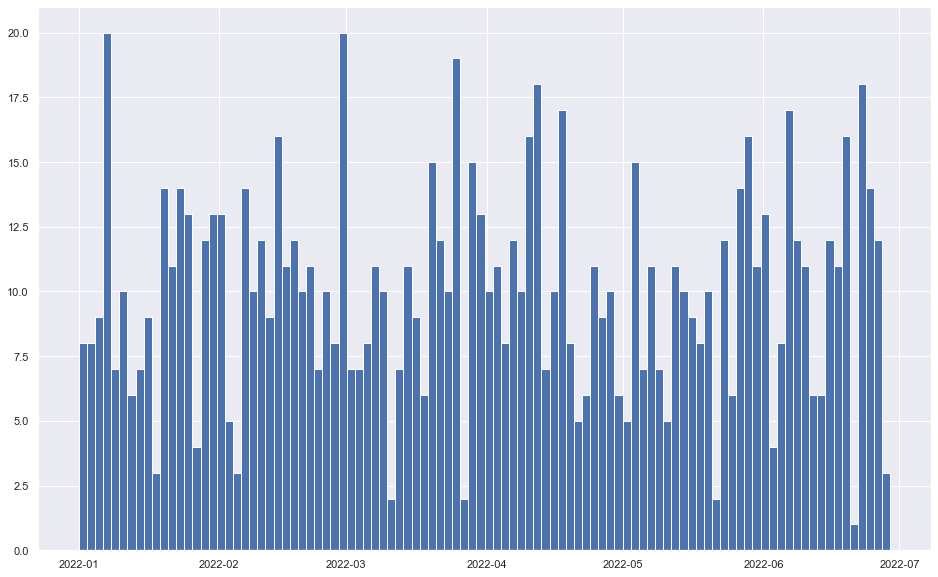

In [52]:
spae_df.RequestDate.hist(bins = 100)

In [53]:
spae_df = spae_df.sort_values('CompleteDate')

spae_df['RunningNet'] = spae_df['Net'].cumsum()

spae_df

,AdvisorID,ClientID,ServiceType,RequestDate,CompleteDate,Duration,OpsTeam,OpsHours,Tier,Price(\$/client),StartDate,EndDate,Channel,Tenure(yrs),ExpenseType,Cost(\$/FTE/hr),OpsCost,Net,RunningNet
615,56ad396b451c42c6882139fe9e7f83ef,7ea9227c-c688-4a92-b354-bd1e3dda8511,A,2022-01-01,2022-01-04,3,1,2.3,Tier 1,250.0,2022-01-01,2022-03-31,Independent,6.740541,Ops,50.0,115.0,135.0,135.0
586,84a0d08ee26142bbbc4099457b4ae116,3f107e29-73d4-4761-af93-40ac5c5c6152,A,2022-01-02,2022-01-04,2,1,3.1,Tier 1,250.0,2022-01-01,2022-03-31,Independent,10.854447,Ops,50.0,155.0,95.0,230.0
539,c8001904c1cb4566acbf48edbabb79b2,dc561c2c-7606-47e3-9cad-6f5dbcefb929,A,2022-01-01,2022-01-05,4,3,5.1,Tier 1,250.0,2022-01-01,2022-03-31,Independent,9.360093,Ops,50.0,255.0,-5.0,225.0
145,2684751e33aa4b1cb4955105c479cdb3,92e878f8-007c-409b-8ce8-944caa68b17a,B,2022-01-01,2022-01-05,4,3,8.9,Tier 1,500.0,2022-01-01,2022-03-31,Independent,3.510060,Ops,50.0,445.0,55.0,280.0
83,cd611ea32b1b48ab86b70be2ea60e400,9cfd2a3d-edf0-4cc5-9b07-0231d13739b4,B,2022-01-01,2022-01-05,4,1,8.5,Tier 1,500.0,2022-01-01,2022-03-31,Institution,14.405360,Ops,50.0,425.0,75.0,355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,7b8c9125f91e4091946fca00cd8d6374,262d3877-ba4f-4cc6-9cc8-cb304f120b28,C,2022-06-25,2022-07-03,8,3,12.0,Tier 2,1100.0,2022-04-01,9999-12-31,Institution,9.649223,Ops,50.0,600.0,500.0,200830.0
955,4908392fb0154135a01cae46c97719dc,77ce6db5-3090-4c7c-a2be-32b9bcca59fb,C,2022-06-27,2022-07-03,6,1,14.9,Tier 2,1100.0,2022-04-01,9999-12-31,Institution,8.361103,Ops,50.0,745.0,355.0,201185.0
847,308530c2ec154aa6818e71d788a58ed4,d3a9d4f6-3034-4627-8a9f-3dd814f88747,C,2022-06-27,2022-07-04,7,3,13.2,Tier 2,1100.0,2022-04-01,9999-12-31,Independent,11.200232,Ops,50.0,660.0,440.0,201625.0
952,a45ad3ec0bee44ae8a17b966212daa40,e7cf31d1-8e16-480e-a479-49965bc3ac6f,C,2022-06-28,2022-07-05,7,3,10.2,Tier 2,1100.0,2022-04-01,9999-12-31,Independent,12.874037,Ops,50.0,510.0,590.0,202215.0


In [54]:
print(spae_df.Net.sum())
print(202630 / 99)

spae_df.Net.groupby(spae_df.AdvisorID).mean().mean()



202630.0
2046.7676767676767


202.92723173376058

In [55]:
spae_df['Completed_Y-M'] = pd.to_datetime(spae_df['CompleteDate']).dt.to_period('M')

spae_df

,AdvisorID,ClientID,ServiceType,RequestDate,CompleteDate,Duration,OpsTeam,OpsHours,Tier,Price(\$/client),StartDate,EndDate,Channel,Tenure(yrs),ExpenseType,Cost(\$/FTE/hr),OpsCost,Net,RunningNet,Completed_Y-M
615,56ad396b451c42c6882139fe9e7f83ef,7ea9227c-c688-4a92-b354-bd1e3dda8511,A,2022-01-01,2022-01-04,3,1,2.3,Tier 1,250.0,2022-01-01,2022-03-31,Independent,6.740541,Ops,50.0,115.0,135.0,135.0,2022-01
586,84a0d08ee26142bbbc4099457b4ae116,3f107e29-73d4-4761-af93-40ac5c5c6152,A,2022-01-02,2022-01-04,2,1,3.1,Tier 1,250.0,2022-01-01,2022-03-31,Independent,10.854447,Ops,50.0,155.0,95.0,230.0,2022-01
539,c8001904c1cb4566acbf48edbabb79b2,dc561c2c-7606-47e3-9cad-6f5dbcefb929,A,2022-01-01,2022-01-05,4,3,5.1,Tier 1,250.0,2022-01-01,2022-03-31,Independent,9.360093,Ops,50.0,255.0,-5.0,225.0,2022-01
145,2684751e33aa4b1cb4955105c479cdb3,92e878f8-007c-409b-8ce8-944caa68b17a,B,2022-01-01,2022-01-05,4,3,8.9,Tier 1,500.0,2022-01-01,2022-03-31,Independent,3.510060,Ops,50.0,445.0,55.0,280.0,2022-01
83,cd611ea32b1b48ab86b70be2ea60e400,9cfd2a3d-edf0-4cc5-9b07-0231d13739b4,B,2022-01-01,2022-01-05,4,1,8.5,Tier 1,500.0,2022-01-01,2022-03-31,Institution,14.405360,Ops,50.0,425.0,75.0,355.0,2022-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,7b8c9125f91e4091946fca00cd8d6374,262d3877-ba4f-4cc6-9cc8-cb304f120b28,C,2022-06-25,2022-07-03,8,3,12.0,Tier 2,1100.0,2022-04-01,9999-12-31,Institution,9.649223,Ops,50.0,600.0,500.0,200830.0,2022-07
955,4908392fb0154135a01cae46c97719dc,77ce6db5-3090-4c7c-a2be-32b9bcca59fb,C,2022-06-27,2022-07-03,6,1,14.9,Tier 2,1100.0,2022-04-01,9999-12-31,Institution,8.361103,Ops,50.0,745.0,355.0,201185.0,2022-07
847,308530c2ec154aa6818e71d788a58ed4,d3a9d4f6-3034-4627-8a9f-3dd814f88747,C,2022-06-27,2022-07-04,7,3,13.2,Tier 2,1100.0,2022-04-01,9999-12-31,Independent,11.200232,Ops,50.0,660.0,440.0,201625.0,2022-07
952,a45ad3ec0bee44ae8a17b966212daa40,e7cf31d1-8e16-480e-a479-49965bc3ac6f,C,2022-06-28,2022-07-05,7,3,10.2,Tier 2,1100.0,2022-04-01,9999-12-31,Independent,12.874037,Ops,50.0,510.0,590.0,202215.0,2022-07


<AxesSubplot:xlabel='CompleteDate', ylabel='RunningNet'>

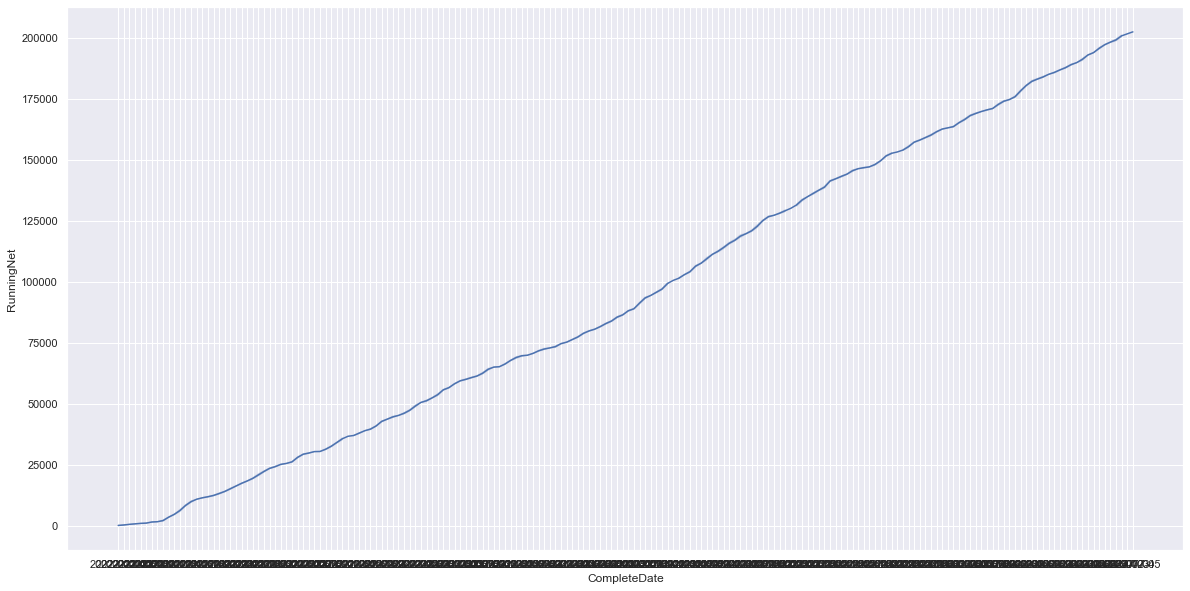

In [125]:
sns.lineplot(data=spae_df, x="CompleteDate", y="RunningNet")

<AxesSubplot:xlabel='Completed_Y-M'>

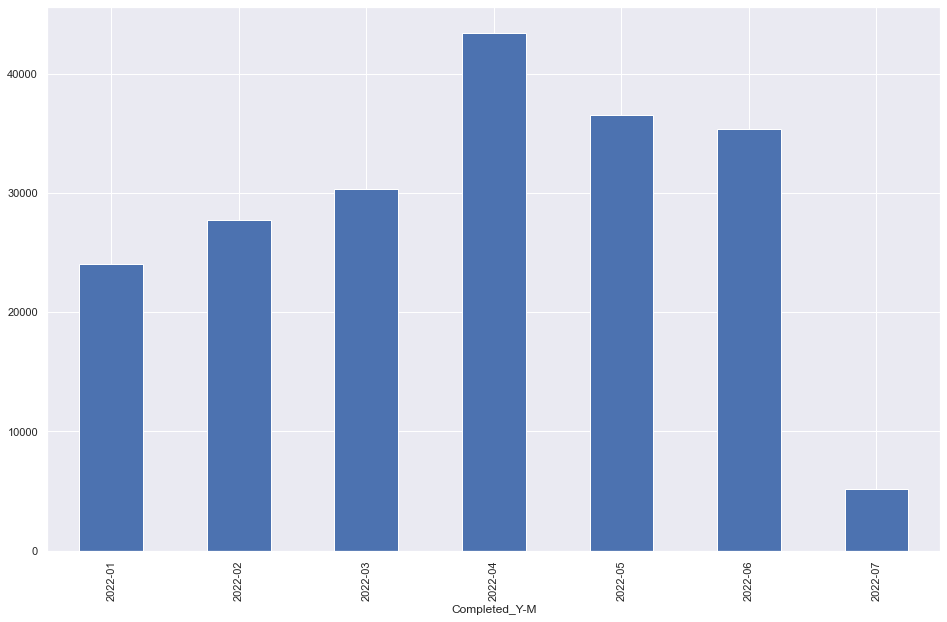

In [57]:
spae_df['Net'].groupby(spae_df['Completed_Y-M']).sum().plot(kind = 'bar')

<AxesSubplot:xlabel='CompleteDate'>

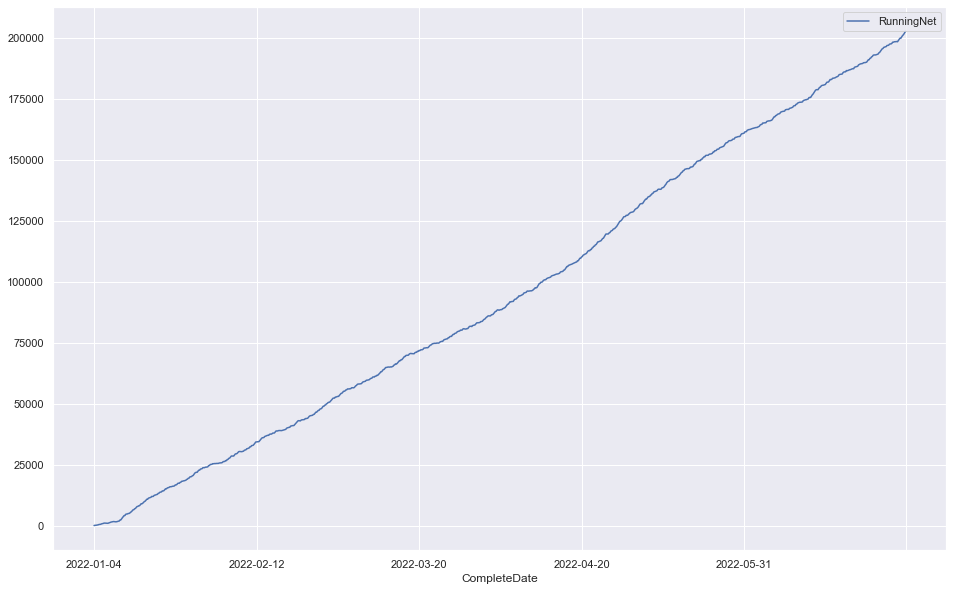

In [58]:
spae_df[['RunningNet', 'CompleteDate']].plot(x = 'CompleteDate', y = 'RunningNet', kind = 'line')

<AxesSubplot:xlabel='Completed_Y-M'>

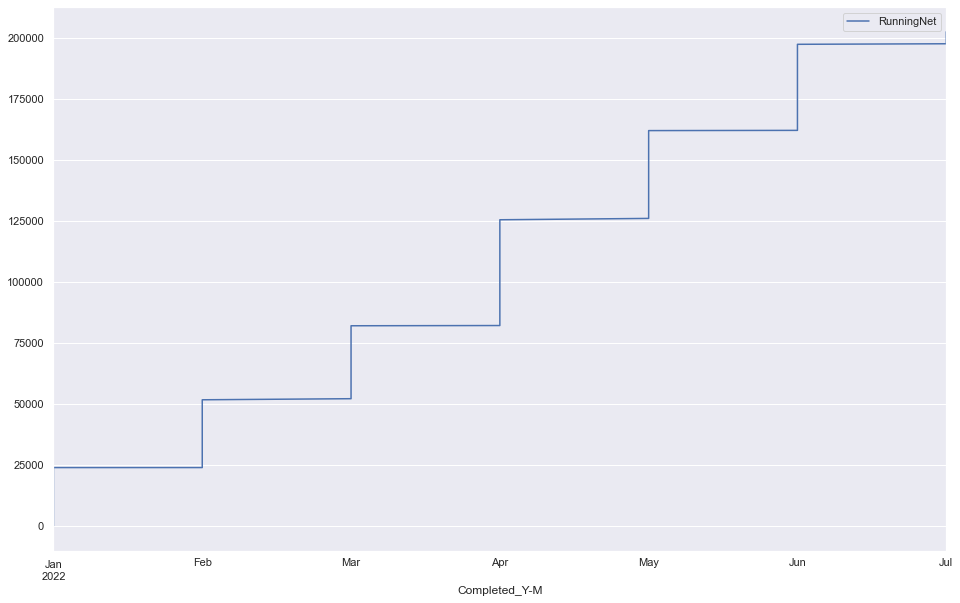

In [59]:
spae_df[['RunningNet', 'Completed_Y-M']].plot(x = 'Completed_Y-M', y = 'RunningNet', kind = 'line')

<AxesSubplot:xlabel='Completed_Y-M'>

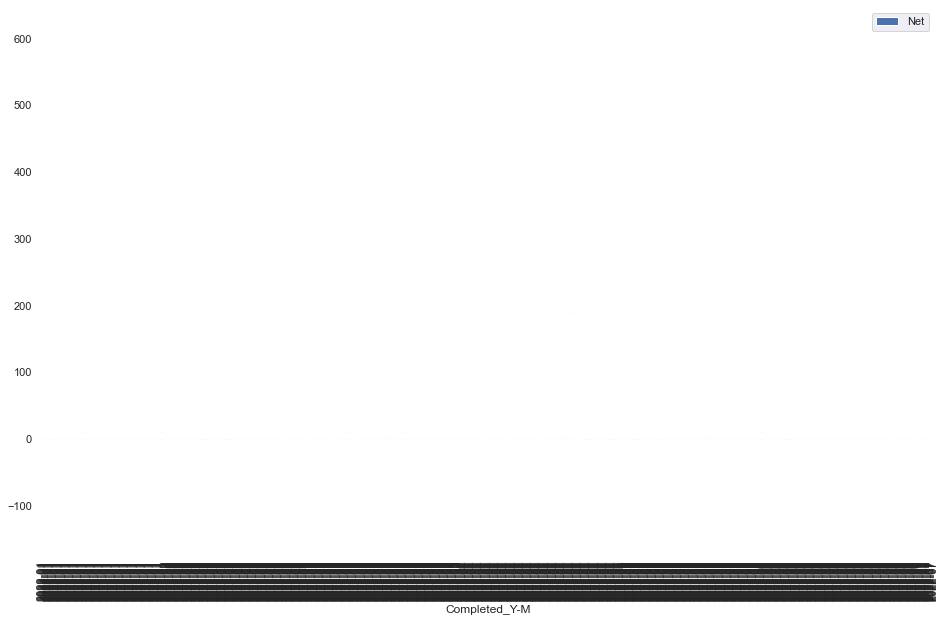

In [60]:
# spae_df[['Net', 'Completed_Y-M']].plot(x = 'Completed_Y-M', y = 'Net', kind = 'bar')

<AxesSubplot:xlabel='CompleteDate'>

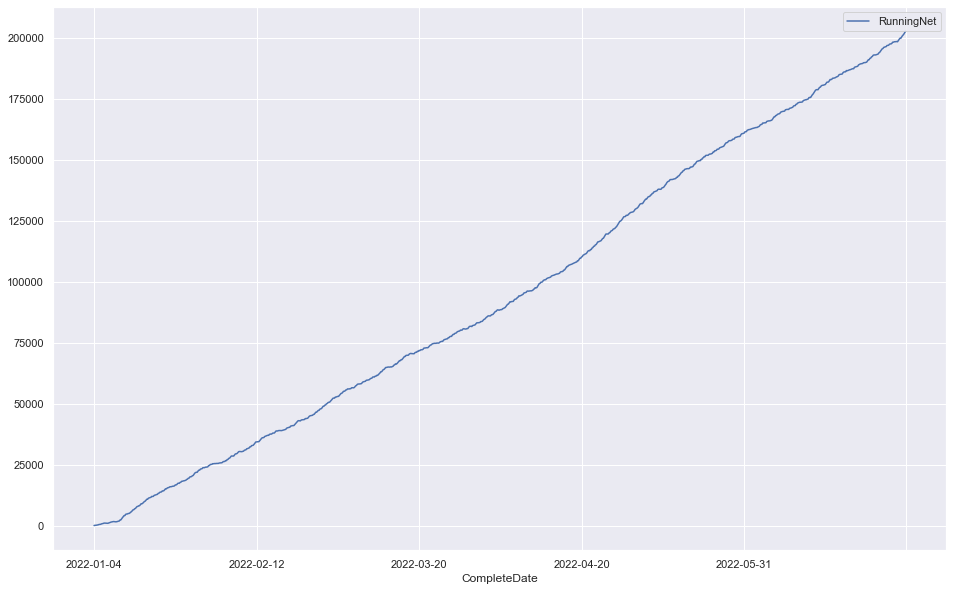

In [61]:
spae_df[['RunningNet', 'CompleteDate']].plot(x = 'CompleteDate', y = 'RunningNet', kind = 'line')

<AxesSubplot:xlabel='CompleteDate'>

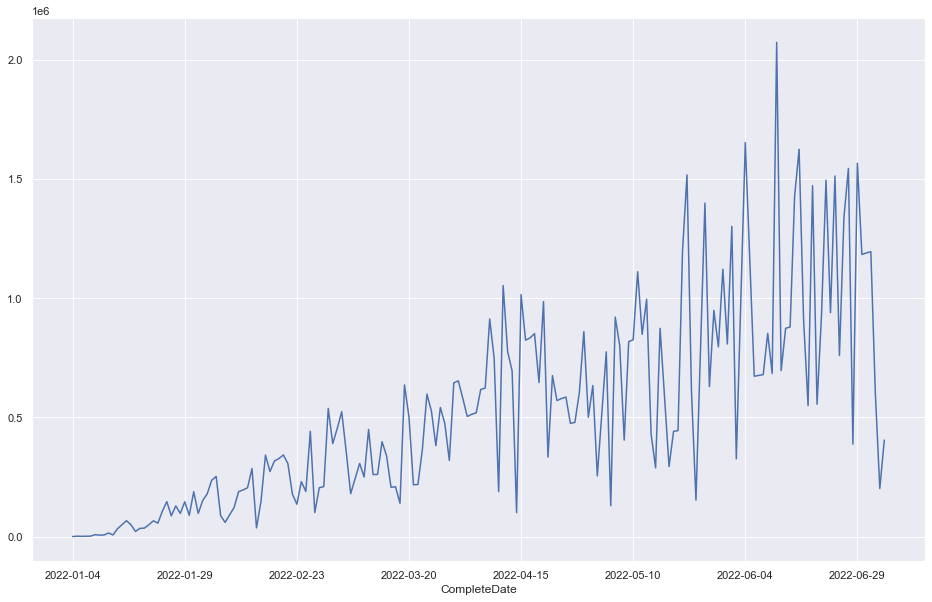

In [62]:
spae_df['RunningNet'].groupby(spae_df['CompleteDate']).sum().plot(kind = 'line')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='CompleteDate', ylabel='Net'>

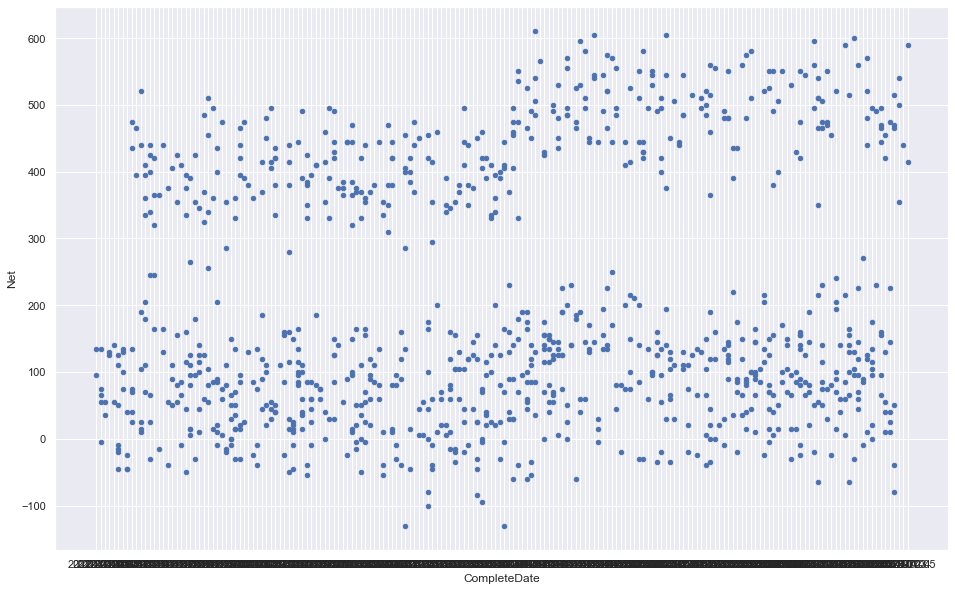

In [63]:
spae_df[['Net', 'CompleteDate']].plot(x = 'CompleteDate', y = 'Net', kind = 'scatter')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='CompleteDate', ylabel='Net'>

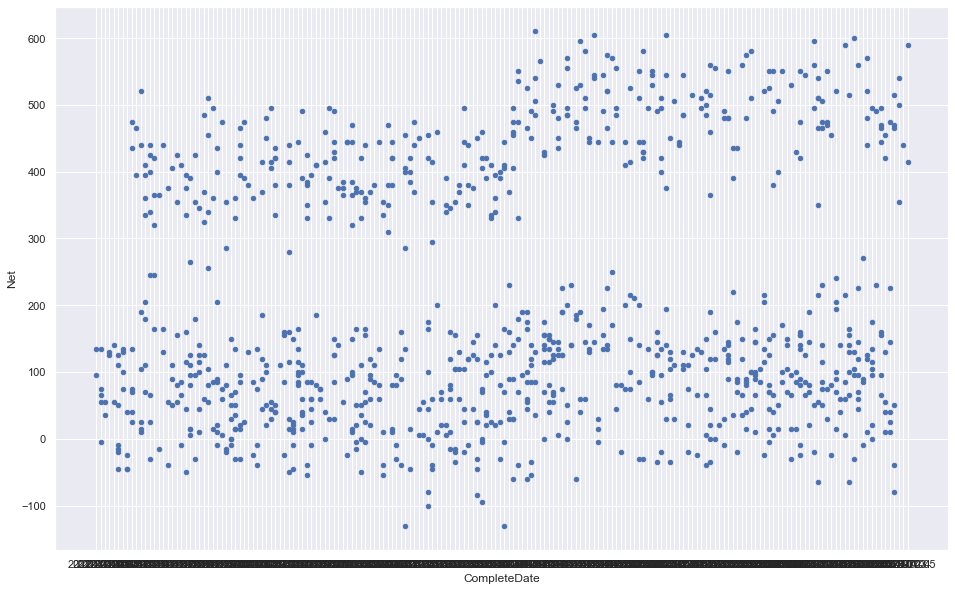

In [64]:
spae_df[['Net', 'CompleteDate', 'Tier']].plot(x = 'CompleteDate', y = 'Net', kind = 'scatter', legend = 'Tier')

<AxesSubplot:xlabel='CompleteDate', ylabel='Net'>

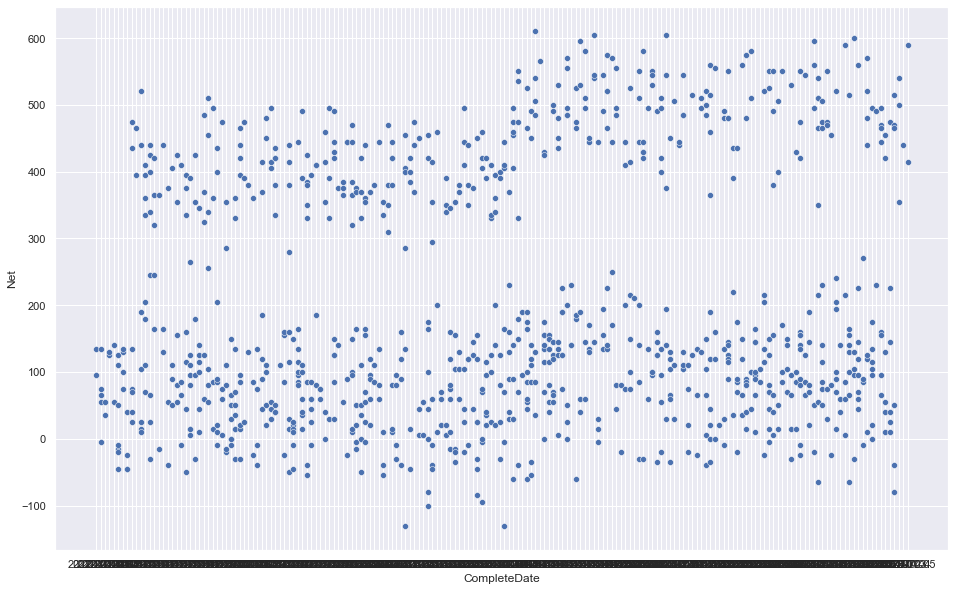

In [65]:
sns.scatterplot(data=spae_df, x="CompleteDate", y="Net")

<AxesSubplot:xlabel='RequestDate', ylabel='Net'>

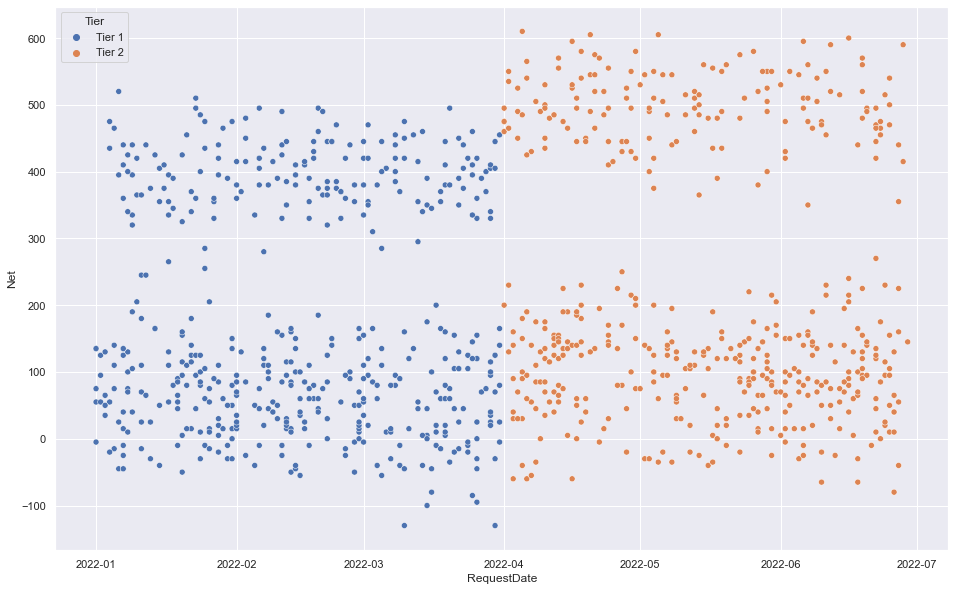

In [66]:
sns.scatterplot(data=spae_df, x="RequestDate", y="Net", hue = 'Tier')

<AxesSubplot:xlabel='RequestDate', ylabel='Net'>

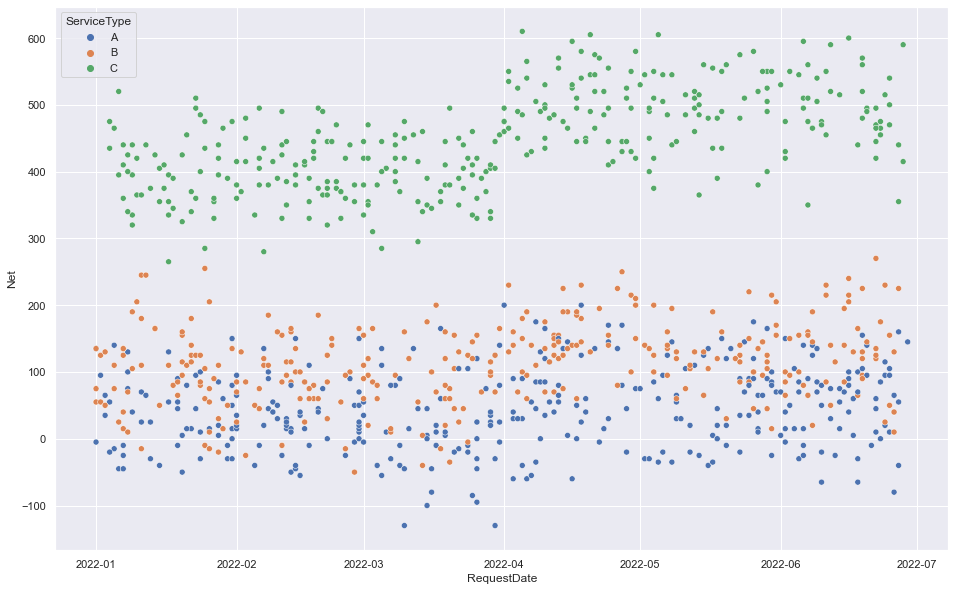

In [67]:
sns.scatterplot(data=spae_df, x="RequestDate", y="Net", hue = 'ServiceType')

In [68]:
# spae_df[['Net', 'Completed_Y-M']].plot(x = 'Completed_Y-M', y = 'Net', kind = 'scatter')
# spae_df[['Net', 'Completed_Y-M']]

In [69]:
spae_df.ServiceType.groupby(spae_df.Channel).value_counts(normalize = True)

Channel      ServiceType
Independent  A              0.360202
             C              0.331234
             B              0.308564
Institution  C              0.378641
             B              0.315534
             A              0.305825
Name: ServiceType, dtype: float64

In [70]:
spae_df.OpsCost.groupby(spae_df.Channel).mean()

Channel
Independent    405.806045
Institution    422.135922
Name: OpsCost, dtype: float64

In [71]:
spae_df.Net.groupby(spae_df.Channel).mean()

Channel
Independent    198.381612
Institution    219.004854
Name: Net, dtype: float64

In [72]:
spae_df['Price(\$/client)'].groupby(spae_df.Channel).mean()

Channel
Independent    604.187657
Institution    641.140777
Name: Price(\$/client), dtype: float64

In [73]:
spae_df['OpsHours'].groupby(spae_df.Channel).mean()

Channel
Independent    8.116121
Institution    8.442718
Name: OpsHours, dtype: float64

In [74]:
print(219 / 641)
print(198.4 / 604)

0.3416536661466459
0.328476821192053


In [75]:
spae_df.Net.sum()

202630.0

In [76]:
spae_df['Price(\$/client)'].sum()

611800.0

In [77]:
202630 / 611800

0.331203007518797

In [78]:
spae_df['Price(\$/client)'].groupby(spae_df['Tier']).sum()

Tier
Tier 1    297750.0
Tier 2    314050.0
Name: Price(\$/client), dtype: float64

In [79]:
spae_df['Net'].groupby(spae_df['Tier']).sum()

Tier
Tier 1     89765.0
Tier 2    112865.0
Name: Net, dtype: float64

In [80]:
spae_df['Net'].groupby(spae_df['Tier']).sum() / spae_df['Price(\$/client)'].groupby(spae_df['Tier']).sum()

Tier
Tier 1    0.301478
Tier 2    0.359385
dtype: float64

In [81]:
spae_df['Price(\$/client)'].groupby(spae_df['ServiceType']).sum()

ServiceType
A     91800.0
B    162500.0
C    357500.0
Name: Price(\$/client), dtype: float64

In [82]:
spae_df['Net'].groupby(spae_df['ServiceType']).sum()

ServiceType
A     15675.0
B     34980.0
C    151975.0
Name: Net, dtype: float64

In [83]:
spae_df['Net'].groupby(spae_df['ServiceType']).sum() / spae_df['Price(\$/client)'].groupby(spae_df['ServiceType']).sum()

ServiceType
A    0.170752
B    0.215262
C    0.425105
dtype: float64

In [84]:
spae_df['Price(\$/client)'].groupby(spae_df['Channel']).sum()

Channel
Independent    479725.0
Institution    132075.0
Name: Price(\$/client), dtype: float64

In [85]:
spae_df['Net'].groupby(spae_df['Channel']).sum()

Channel
Independent    157515.0
Institution     45115.0
Name: Net, dtype: float64

In [86]:
spae_df['Net'].groupby(spae_df['Channel']).sum() / spae_df['Price(\$/client)'].groupby(spae_df['Channel']).sum()

Channel
Independent    0.328344
Institution    0.341586
dtype: float64

In [87]:
202630 / 611800

0.331203007518797

In [88]:
spae_df['Net'].groupby(spae_df['Tier']).sum() / spae_df['Price(\$/client)'].groupby(spae_df['Tier']).sum()

Tier
Tier 1    0.301478
Tier 2    0.359385
dtype: float64

In [89]:
spae_df['Net'].groupby(spae_df['ServiceType']).sum() / spae_df['Price(\$/client)'].groupby(spae_df['ServiceType']).sum()

ServiceType
A    0.170752
B    0.215262
C    0.425105
dtype: float64

In [90]:
spae_df['Net'].groupby(spae_df['Channel']).sum() / spae_df['Price(\$/client)'].groupby(spae_df['Channel']).sum()

Channel
Independent    0.328344
Institution    0.341586
dtype: float64

**Profit Margins:**

* **Overall:** 33.1%
<br/>

* **Channel:**
    * Independent: 32.8%
    * Institutional: 34.2%
<br/><br/>

* **Tier:**
    * Tier 1: 30.1%
    * Tier 2: 35.9%
<br/><br/>

* **Service Type:**
    * A: 17.1%
    * B: 21.5%
    * C: 42.5%

# Results

# LPL Case Study

## Part 1: Analytics Framework

### Goals:

* Which metrics are critical to evaluate? 
* At a high-level, what data would be required for these metrics and how might you source it? 
* Are there any data sensitivities? 

Imagine you’re starting a new business that provides
a service for Financial Advisors. Currently, some
Advisors independently provide the service to their
end-clients. Other Advisors do not provide the
service at all since it can be time consuming and
requires an investment upfront to build the necessary
skillset. Your new business gives the Advisor the
opportunity to outsource this service to you, saving
time for Advisors previously providing the service
and expanding the business proposition of those not
qualified to provide it. The Advisors are your direct
customers making payment to you; they also act as
a liaison between you and the end-client. Advisors
can subscribe to the service for a 6-month period in
two ways: (1) pay as you go (pay for only what is
needed at a premium cost per service) or (2)
contract with minimum commitment (discounted cost
per service with total contract amount paid in equal
amounts each month). You are part of your business’
management team that oversees both the business
itself and the team of operational staff that does the
tangible service work.

#### Which metrics are critical to evaluate?

* Finance:
    * What is our cost to provide the service?
    * Given that we have different services / pricing levels, what is our profit margin for each service?
    * What are profits and costs for each type of subscription?
    * Do certain service levels require higher operational expenses, and should these only be offered to Advisors who are managing higher amounts?
<br/>
<br/>

* Usage:
    * Of the Advisors who use the service, what percentage use each type of service?
    * Of the Advisors who use the service, what percentage use each type of subscription?
    * Over time, do we see different usage levels for each type of service we offer?
    * Are we seeing a change over time in the percentage of our Advisors who use the service vs the Advisors who don't?
    * What is the average retention / churn rate for Advisors with our services vs Advisors without our services vs overall?
        * By service type?
<br/>   
<br/>
* Clients:
    * For each service level that we offer, what percentage of end-clients are within each level, out of the clients who have Advisors that use at least one service
    * For the Advisors that switch from not using our service to using at least one service, do they see an increase in the number of clients? Is their client growth higher after starting service vs client growth prior to using the service?
    * Feedback / ratings / satisfaction among clients for each type of service offered
    * Do we see higher satisfaction rates among clients who have an Advisor that uses at least one service?
    * Conversely, do we see lower satisfcation rates among clients who have an Advisor that does not use at least one service?
    * What is the average client count for Advisors who use the service vs Advisors who don't?
        * What is the average count by service type?
    

#### At a high-level, what data would be required for these metrics and how might you source it? 

* Finance:
    * expenses / profit / revenue for each type of service
        * operations / internal teams / cost of infrastructure and tools / revenue by service type
    * expenses / profit / revenue for each type of subscription
        * operations / internal teams / cost of infrastructure and tools / revenue by subscription type
    * the amount each Advisor manages
        * sourced from the Advisors 
<br/>
<br/>
* Usage
    * what type of service does each Advisor use
        * sourced from the Advisors 
    * what type of subscription does each Advisor use 
        * sourced from the Advisors 
    * total Advisor count
        * internal data / sourced from the Advisors
<br/>    
<br/>
* Clients
    * count of clients by month for each service type 
        * sourced from the Advisors 
    * count of clients by month for each Advisor 
        * sourced from the Advisors 
    * client feedback 
        * survey data, form on a website
    * how many clients leave each month
        * internal data or the Advisors
    

#### Are there any data sensitivities? 

* Any PII related to clients should be scrubbed out, except for maybe age (but DOB should not be included)
* Advisor PII should be scrubbed from the data and only referred to by ID unless we need to communicate with them directly
* Once we determine what metrics to use, we should also determine which of those metrics can be shared with Advisors and clients and which metrics should stay internal to management

## Part 2: Data Analysis

### Goals:

* Explore the data and see what insights you can find 
* Determine how best to visualize the data 
* Start with a descriptive analysis of the historical data
    * What is essential to know? 
    * Profitability, sales, operational efficiency & productivity... are there trends, good or bad? 
* Bonus (not required) Perform a simple predictive analysis to forecast one of the metrics

## TakeAways

#### **High Level Stats:**

* Personnel Costs: \\$320,000
* Gain from Services Provided: \\$202,630
* 99 individual Advisors, 947 individual Clients
* Advisor average tenure: 7 years
    * Independent: 6.9 years
    * Institution: 7.3 years
* On average, a request took 8.2 hours to complete over 5.2 days and required 2 team members
* The average gain per service request is ~\\$203
* Average gain per Advisor: \\$2047
* Each Advisor has an average of 10 clients
* 33% profit margin overall (total Net / total Price)
* First Request Date: 01-01-2022
* Last Complete Date: 07-05-2022

### Notes and Assumptions

* two pricing tiers based on the Start Date
* assigned Tier to the request based on Request Date
* Cost = ops hours * FTE/hour (all ExpenseTypes were Ops)
* Net = Price - Cost

#### **Tables and Breakdowns:**

**Profit Margins:**

* **Overall:** 33.1%
<br/>

* **Channel:**
    * Independent: 32.8%
    * Institutional: 34.2%
<br/><br/>

* **Tier:**
    * Tier 1: 30.1%
    * Tier 2: 35.9%
<br/><br/>

* **Service Type:**
    * A: 17.1%
    * B: 21.5%
    * C: 42.5%

* Tiers:
    * Tier 1
        * Average Gain: \\$178.50
        * Total Gain: \\$89,765
    * Tier 2
        * Average Gain: \\$227.10
        * Total Gain: \\$112,865
    * Tier 2 saw a higher average gain per request due to the higher pricing scheme
    
<br/>
    
* Channel:
    * Institution
        * Average Gain: \\$219.00
        * Total Gain: \\$45,115
    * Independent
        * Average Gain: \\$198.40
        * Total Gain: \\$157,515
    * Roughly 8x the number of Independent Advisors as Institutional Advisors

    

**Net by Tier:**

In [106]:
pd.DataFrame({'Average Net by Tier' :spae_df['Net'].groupby(spae_df['Tier']).mean()})

,Average Net by Tier
Tier,
Tier 1,178.459245
Tier 2,227.092555


In [92]:
pd.DataFrame({'Total Net by Tier' :spae_df['Net'].groupby(spae_df['Tier']).sum()})

,Total Net by Tier
Tier,
Tier 1,89765.0
Tier 2,112865.0


**Net by Channel:**

In [93]:
pd.DataFrame({'Average Net by Channel' :spae_df['Net'].groupby(spae_df['Channel']).mean()})

,Average Net by Channel
Channel,
Independent,198.381612
Institution,219.004854


In [94]:
pd.DataFrame({'Total Net by Channel' :spae_df['Net'].groupby(spae_df['Channel']).sum()})

,Total Net by Channel
Channel,
Independent,157515.0
Institution,45115.0


**Net by Service Type:**

In [95]:
pd.DataFrame({'Average Net by Service Type' :spae_df['Net'].groupby(spae_df['ServiceType']).mean()})

,Average Net by Service Type
ServiceType,
A,44.914040
B,112.838710
C,445.674487


In [96]:
pd.DataFrame({'Total Net by Service Type' :spae_df['Net'].groupby(spae_df['ServiceType']).sum()})

,Total Net by Service Type
ServiceType,
A,15675.0
B,34980.0
C,151975.0


**Net by Tier and Service Type:**

In [97]:
table = pd.pivot_table(spae_df, values='Net', index=['Tier'], columns=['ServiceType'], aggfunc=np.mean)
print('Average Net by Tier and Service Type')
table

Average Net by Tier and Service Type


ServiceType,A,B,C
Tier,,,
Tier 1,29.011976,92.187500,398.693182
Tier 2,59.505495,134.866667,495.787879


In [98]:
table = pd.pivot_table(spae_df, values='Net', index=['Tier'], columns=['ServiceType'], aggfunc=np.sum)
print('Total Net by Tier and Service Type')
table

Total Net by Tier and Service Type


ServiceType,A,B,C
Tier,,,
Tier 1,4845.0,14750.0,70170.0
Tier 2,10830.0,20230.0,81805.0


**Breakdown of All Transactions by Tier and Service Type:**

In [99]:
# print(spae_df.crosstab(spae_df[['ServiceType', 'Tier']]).sum())

# spae_df['Net'].groupby(spae_df['ServiceType']).describe()



pd.crosstab(spae_df['Tier'], [spae_df['ServiceType']], rownames=['Request Breakdown by Tier and Service Type'], colnames=['Tier'], normalize = True)


Tier,A,B,C
Request Breakdown by Tier and Service Type,,,
Tier 1,0.167,0.16,0.176
Tier 2,0.182,0.15,0.165


**Operations - Average Metrics:**

In [100]:
table = pd.pivot_table(spae_df, values=['Duration', 'OpsTeam', 'OpsHours'], index=['Tier'], columns=['ServiceType'], aggfunc=np.mean)
print('Operations Averages')
table

Operations Averages


Duration                    OpsHours                       \
ServiceType         A        B         C        A         B          C   
Tier                                                                     
Tier 1       3.556886  4.48125  7.443182  4.41976  8.156250  12.026136   
Tier 2       3.510989  4.54000  7.503030  4.30989  8.302667  12.084242   

              OpsTeam                     
ServiceType         A        B         C  
Tier                                      
Tier 1       1.988024  2.06875  2.028409  
Tier 2       2.137363  2.06000  2.103030

#### **Charts:**

**Net by Month:**

AxesSubplot(0.125,0.125;0.775x0.755)


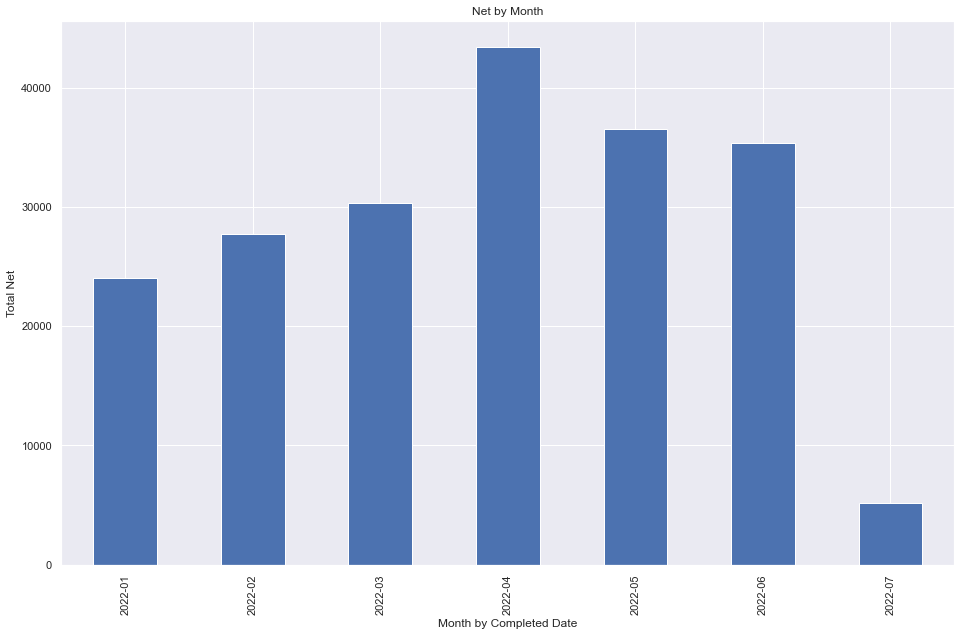

In [101]:
print(spae_df['Net'].groupby(spae_df['Completed_Y-M']).sum().plot(kind = 'bar', title = 'Net by Month', xlabel = 'Month by Completed Date', ylabel = 'Total Net', figsize = (16, 10)))

**Running Total by Day:**

AxesSubplot(0.125,0.125;0.775x0.755)


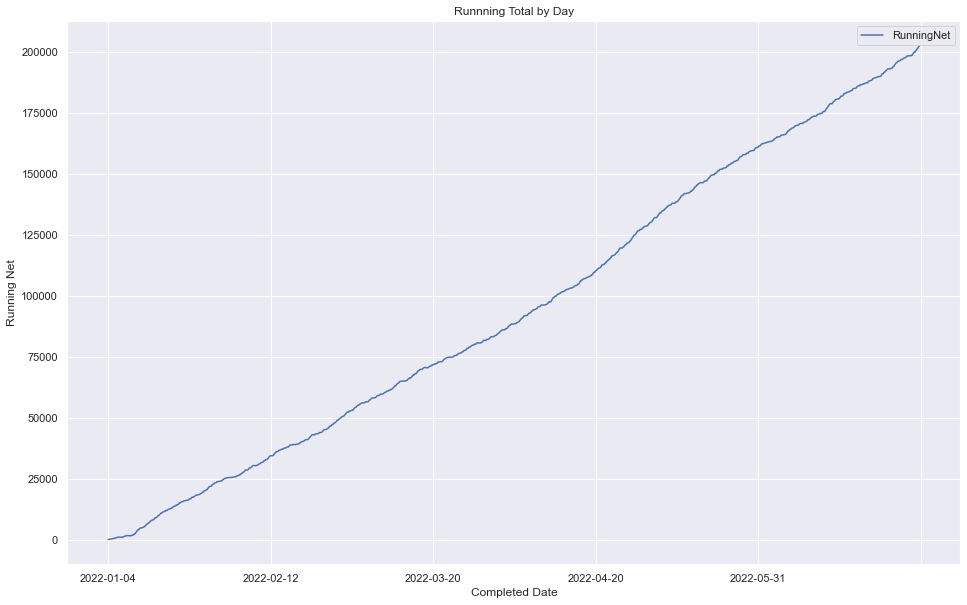

In [102]:
print(spae_df[['RunningNet', 'CompleteDate']].plot(x = 'CompleteDate', y = 'RunningNet', kind = 'line', title = 'Runnning Total by Day', xlabel = 'Completed Date', ylabel = 'Running Net', figsize = (16, 10)))

**Running Total by Month:**

AxesSubplot(0.125,0.125;0.775x0.755)


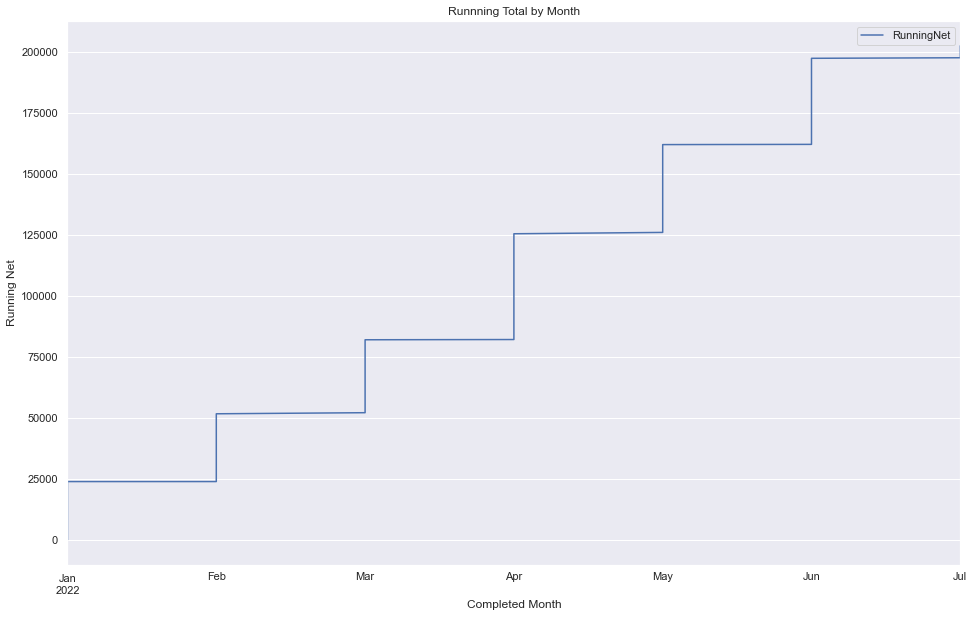

In [103]:
print(spae_df[['RunningNet', 'Completed_Y-M']].plot(x = 'Completed_Y-M', y = 'RunningNet', kind = 'line', title = 'Runnning Total by Month', xlabel = 'Completed Month', ylabel = 'Running Net', figsize = (16, 10)))

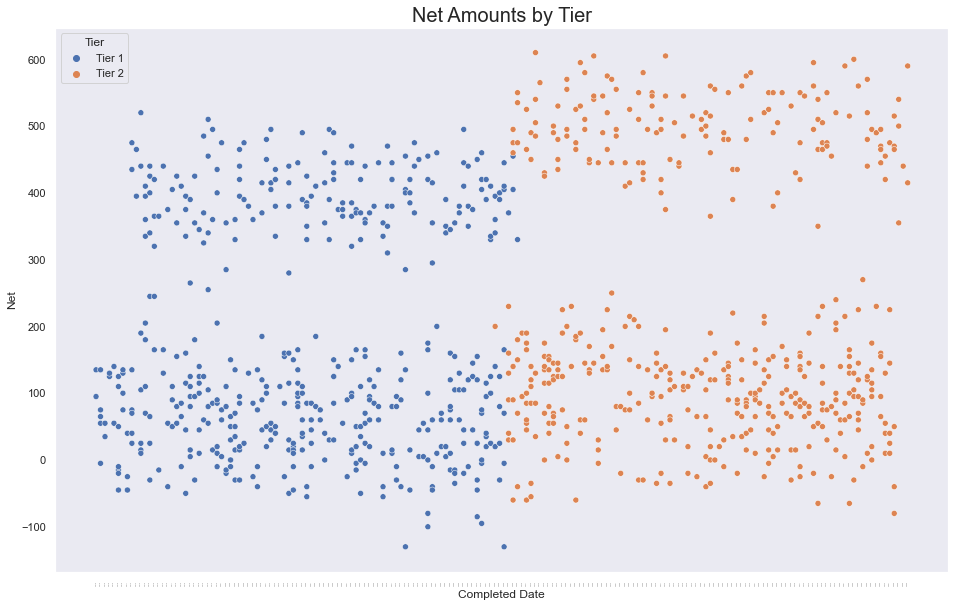

In [104]:
ax = sns.scatterplot(data=spae_df, x="CompleteDate", y="Net", hue = 'Tier').grid(False)

ax
plt.xticks(rotation = 90, size = 0)
plt.xlabel("Completed Date")
plt.title("Net Amounts by Tier", size = 20)

plt.show()
# plt.xticks(rotation = 45)

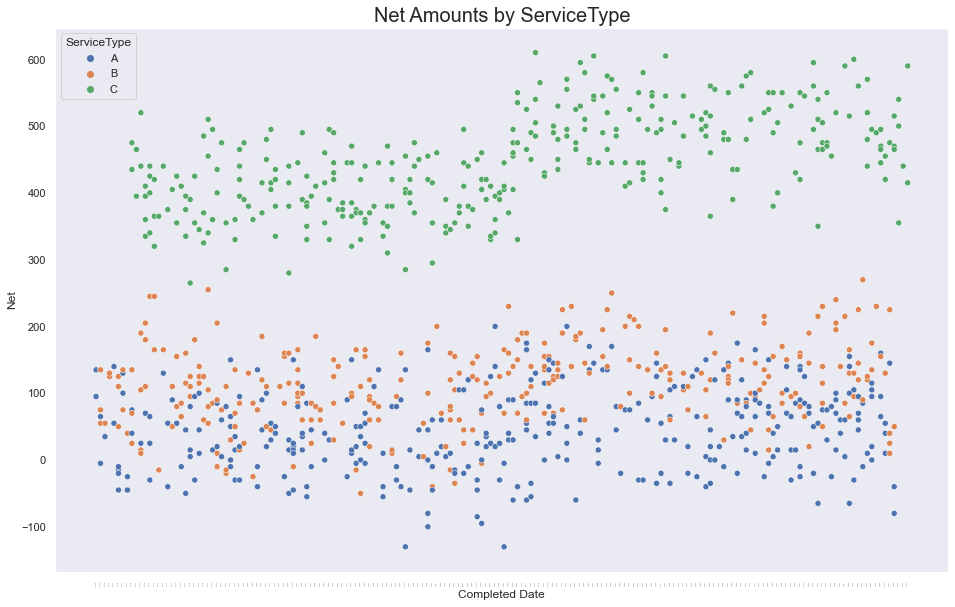

In [105]:

ax = sns.scatterplot(data=spae_df, x="CompleteDate", y="Net", hue = 'ServiceType').grid(False)

ax
plt.xticks(rotation = 90, size = 0)
plt.xlabel("Completed Date")
plt.title("Net Amounts by ServiceType", size = 20)

plt.show()
# plt.xticks(rotation = 45)

### Conclusions:

* The switch to Tier 2 pricing will benefit us going forward. The higher pricing per Service Type will lead to higher revenue
* We see higher margins among Institutional Advisors and with Service C
    * This can be a focus area going forward
    * Is it possible to reduce expenses for Services A and B?
* Improving some of the Operations metrics can lead to higher margins:
    * Fewer days to implement each Request
    * Fewer hours to implement each Request
    * Fewer team members to implement each Request


In [107]:
# jupyter nbconvert --to pdf --TemplateExporter.exclude_input=True  LPL_Case_Study.ipynb --no-prompt

SyntaxError: invalid syntax (<ipython-input-107-e7dd785218bd>, line 1)

In [114]:
spae_df.AdvisorID.groupby(spae_df['Completed_Y-M']).count()

Completed_Y-M
2022-01    138
2022-02    156
2022-03    174
2022-04    183
2022-05    154
2022-06    177
2022-07     18
Freq: M, Name: AdvisorID, dtype: int64

In [112]:
spae_df.Net.groupby(spae_df['Completed_Y-M']).sum()

Completed_Y-M
2022-01    24050.0
2022-02    27780.0
2022-03    30330.0
2022-04    43435.0
2022-05    36535.0
2022-06    35360.0
2022-07     5140.0
Freq: M, Name: Net, dtype: float64

In [126]:
spae_df.OpsCost.groupby(spae_df['Completed_Y-M']).sum()

Completed_Y-M
2022-01    55200.0
2022-02    64470.0
2022-03    72920.0
2022-04    74440.0
2022-05    65215.0
2022-06    67490.0
2022-07     9435.0
Freq: M, Name: OpsCost, dtype: float64

In [127]:
spae_df['Price(\\$/client)'].groupby(spae_df['Completed_Y-M']).sum()

Completed_Y-M
2022-01     79250.0
2022-02     92250.0
2022-03    103250.0
2022-04    117875.0
2022-05    101750.0
2022-06    102850.0
2022-07     14575.0
Freq: M, Name: Price(\$/client), dtype: float64

In [128]:
spae_df['ServiceType'].groupby(spae_df['Completed_Y-M']).value_counts()

Completed_Y-M  ServiceType
2022-01        B              53
               A              43
               C              42
2022-02        C              54
               A              51
               B              51
2022-03        C              63
               A              61
               B              50
2022-04        C              67
               A              63
               B              53
2022-05        C              58
               A              54
               B              42
2022-06        A              74
               B              56
               C              47
2022-07        C              10
               B               5
               A               3
Name: ServiceType, dtype: int64

In [123]:
spae_df.ClientID.groupby(spae_df['Completed_Y-M']).count()

Completed_Y-M
2022-01    138
2022-02    156
2022-03    174
2022-04    183
2022-05    154
2022-06    177
2022-07     18
Freq: M, Name: ClientID, dtype: int64

In [121]:
spae_df

,AdvisorID,ClientID,ServiceType,RequestDate,CompleteDate,Duration,OpsTeam,OpsHours,Tier,Price(\$/client),StartDate,EndDate,Channel,Tenure(yrs),ExpenseType,Cost(\$/FTE/hr),OpsCost,Net,RunningNet,Completed_Y-M
615,56ad396b451c42c6882139fe9e7f83ef,7ea9227c-c688-4a92-b354-bd1e3dda8511,A,2022-01-01,2022-01-04,3,1,2.3,Tier 1,250.0,2022-01-01,2022-03-31,Independent,6.740541,Ops,50.0,115.0,135.0,135.0,2022-01
586,84a0d08ee26142bbbc4099457b4ae116,3f107e29-73d4-4761-af93-40ac5c5c6152,A,2022-01-02,2022-01-04,2,1,3.1,Tier 1,250.0,2022-01-01,2022-03-31,Independent,10.854447,Ops,50.0,155.0,95.0,230.0,2022-01
539,c8001904c1cb4566acbf48edbabb79b2,dc561c2c-7606-47e3-9cad-6f5dbcefb929,A,2022-01-01,2022-01-05,4,3,5.1,Tier 1,250.0,2022-01-01,2022-03-31,Independent,9.360093,Ops,50.0,255.0,-5.0,225.0,2022-01
145,2684751e33aa4b1cb4955105c479cdb3,92e878f8-007c-409b-8ce8-944caa68b17a,B,2022-01-01,2022-01-05,4,3,8.9,Tier 1,500.0,2022-01-01,2022-03-31,Independent,3.510060,Ops,50.0,445.0,55.0,280.0,2022-01
83,cd611ea32b1b48ab86b70be2ea60e400,9cfd2a3d-edf0-4cc5-9b07-0231d13739b4,B,2022-01-01,2022-01-05,4,1,8.5,Tier 1,500.0,2022-01-01,2022-03-31,Institution,14.405360,Ops,50.0,425.0,75.0,355.0,2022-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,7b8c9125f91e4091946fca00cd8d6374,262d3877-ba4f-4cc6-9cc8-cb304f120b28,C,2022-06-25,2022-07-03,8,3,12.0,Tier 2,1100.0,2022-04-01,9999-12-31,Institution,9.649223,Ops,50.0,600.0,500.0,200830.0,2022-07
955,4908392fb0154135a01cae46c97719dc,77ce6db5-3090-4c7c-a2be-32b9bcca59fb,C,2022-06-27,2022-07-03,6,1,14.9,Tier 2,1100.0,2022-04-01,9999-12-31,Institution,8.361103,Ops,50.0,745.0,355.0,201185.0,2022-07
847,308530c2ec154aa6818e71d788a58ed4,d3a9d4f6-3034-4627-8a9f-3dd814f88747,C,2022-06-27,2022-07-04,7,3,13.2,Tier 2,1100.0,2022-04-01,9999-12-31,Independent,11.200232,Ops,50.0,660.0,440.0,201625.0,2022-07
952,a45ad3ec0bee44ae8a17b966212daa40,e7cf31d1-8e16-480e-a479-49965bc3ac6f,C,2022-06-28,2022-07-05,7,3,10.2,Tier 2,1100.0,2022-04-01,9999-12-31,Independent,12.874037,Ops,50.0,510.0,590.0,202215.0,2022-07
